# Homework 3 - Ames Housing Dataset

For all parts below, answer all parts as shown in the Google document for Homework 3. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

In [381]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [382]:
x_train = pd.read_csv('train.csv')
x_test = pd.read_csv('test.csv')
print("train : ", x_train.shape)
print("test : " , x_test.shape)
print(x_train.head(5))

train :  (1460, 81)
test :  (1459, 80)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondi

In [383]:
train_ID = x_train['Id']
test_ID = x_test['Id']
# Drop Id column from train and test data sets
x_train.drop("Id", axis = 1, inplace = True)
x_test.drop("Id", axis = 1, inplace = True)

In [384]:
train_missing = pd.isna(x_train).sum()
test_missing = pd.isna(x_test).sum()

missing = pd.concat([train_missing, test_missing], axis=1, keys=["Train_Missing", "Test_Missing"])
missing = missing[missing.sum(axis=1) > 0]
missing

,Train_Missing,Test_Missing
Alley,1369,1352.0
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0
BsmtFinType1,37,42.0
BsmtFinType2,38,42.0
BsmtFullBath,0,2.0
BsmtHalfBath,0,2.0
BsmtQual,37,44.0


In [385]:
#There're some meaningful missing values in data which can be understood from description of data.

meaningful_val_miss = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
                    "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", 
                    "GarageCond", "Fence","PoolQC", "MiscFeature","MasVnrType"]
for each_col in meaningful_val_miss:
    x_train[each_col].fillna("None", inplace=True)
    x_test[each_col].fillna("None", inplace=True)

In [386]:
# Some of the numerical features in data seems categorical. 
#MSSubClass and MoSold (Month sold)
#Converting them into categorical
x_train = x_train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

x_test = x_test.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [387]:
numeric_train = x_train.select_dtypes(include=[np.number])
numeric_test = x_test.select_dtypes(include=[np.number])
print(numeric_train.columns)

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice'],
      dtype='object')


In [388]:
# filling NA's of numerical variables with mean
x_train.fillna(numeric_train.mean(),inplace=True)
x_test.fillna(numeric_test.mean(),inplace=True)

In [389]:
numeric_train.fillna(numeric_train.mean(),inplace=True)
numeric_test.fillna(numeric_test.mean(),inplace=True)

In [390]:
#LotFrontage which is Numeric value has many missing values so we remove it
x_train.drop("LotFrontage", axis=1, inplace=True)
x_test.drop("LotFrontage", axis=1, inplace=True)

numeric_train.drop("LotFrontage", axis=1, inplace=True)
numeric_test.drop("LotFrontage", axis=1, inplace=True)

In [391]:
# filling categorical variables with mode
x_train['Electrical'] = x_train['Electrical'].fillna(x_train['Electrical'].mode()[0])

In [392]:
x_test['Exterior1st'] = x_test['Exterior1st'].fillna(x_test['Exterior1st'].mode()[0])
x_test['Exterior2nd'] = x_test['Exterior2nd'].fillna(x_test['Exterior2nd'].mode()[0])
x_test['Functional'] = x_test['Functional'].fillna(x_test['Functional'].mode()[0])
x_test['KitchenQual'] = x_test['KitchenQual'].fillna(x_test['KitchenQual'].mode()[0])
x_test['MSZoning'] = x_test['MSZoning'].fillna(x_test['MSZoning'].mode()[0])
x_test['SaleType'] = x_test['SaleType'].fillna(x_test['SaleType'].mode()[0])
x_test['Utilities'] = x_test['Utilities'].fillna(x_test['Utilities'].mode()[0])

In [393]:
#Adding new features to train and test data
# Overall quality of the house
# Total number of bathrooms
numeric_train["TotalBath"] = numeric_train["BsmtFullBath"] + (0.5 * numeric_train["BsmtHalfBath"]) + \
numeric_train["FullBath"] + (0.5 * numeric_train["HalfBath"])

numeric_test["TotalBath"] = numeric_test["BsmtFullBath"] + (0.5 * numeric_test["BsmtHalfBath"]) + \
numeric_test["FullBath"] + (0.5 * numeric_test["HalfBath"])

# Total SF for house (incl. basement)
numeric_train["AllSF"] = numeric_train["GrLivArea"] + numeric_train["TotalBsmtSF"]

numeric_test["AllSF"] = numeric_test["GrLivArea"] + numeric_test["TotalBsmtSF"]

# Total SF for 1st + 2nd floors
numeric_train["AllFlrsSF"] = numeric_train["1stFlrSF"] + numeric_train["2ndFlrSF"]

numeric_test["AllFlrsSF"] = numeric_test["1stFlrSF"] + numeric_test["2ndFlrSF"]

# Total SF for porch
numeric_train["AllPorchSF"] = numeric_train["OpenPorchSF"] + numeric_train["EnclosedPorch"] + \
numeric_train["3SsnPorch"] + numeric_train["ScreenPorch"]

numeric_test["AllPorchSF"] = numeric_test["OpenPorchSF"] + numeric_test["EnclosedPorch"] + \
numeric_test["3SsnPorch"] + numeric_test["ScreenPorch"]

In [394]:
y_train_label = np.log(numeric_train['SalePrice'])
numeric_train.drop(['SalePrice'], axis = 1, inplace=True)

In [395]:
categoric_train = x_train.select_dtypes(include=[np.object])
categoric_test = x_test.select_dtypes(include=[np.object])
print(categoric_train.columns)
print(categoric_test.columns)

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')
Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       

In [396]:
categoric_train_test = pd.concat([categoric_train , categoric_test])

In [397]:
ntrain = categoric_train.shape[0]
ntrain

1460

In [398]:
categoric_onehot = pd.get_dummies(categoric_train_test, columns=categoric_train_test.columns)

In [399]:
#Separating Categorical features of Train and test data sets after encoding
categoric_train_encod = categoric_onehot[:ntrain]
categoric_test_encod = categoric_onehot[ntrain:]

In [400]:
train_final = pd.concat([numeric_train, categoric_train_encod],axis=1)
test_final = pd.concat([numeric_test, categoric_test_encod],axis=1)

## Part 1 - Pairwise Correlations

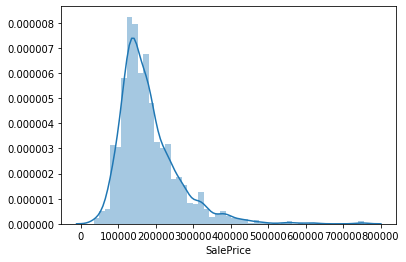

In [401]:
sns.distplot(x_train['SalePrice']);

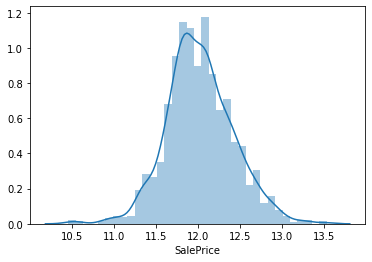

In [402]:
sns.distplot(np.log(x_train['SalePrice']));

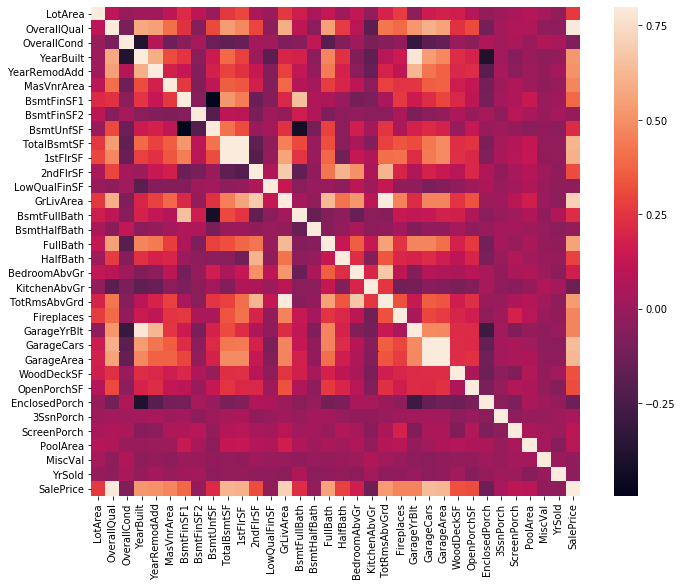

In [403]:
#correlation matrix
corrmat = x_train.corr(method = 'pearson')
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [404]:
cols = corrmat.nlargest(7, 'SalePrice')['SalePrice'].index
smallest_cols = corrmat.nsmallest(7, 'SalePrice')['SalePrice'].index
print(list(cols) + list(smallest_cols))
merged_cols = list(cols) + list(smallest_cols)

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'KitchenAbvGr', 'EnclosedPorch', 'OverallCond', 'YrSold', 'LowQualFinSF', 'MiscVal', 'BsmtHalfBath']


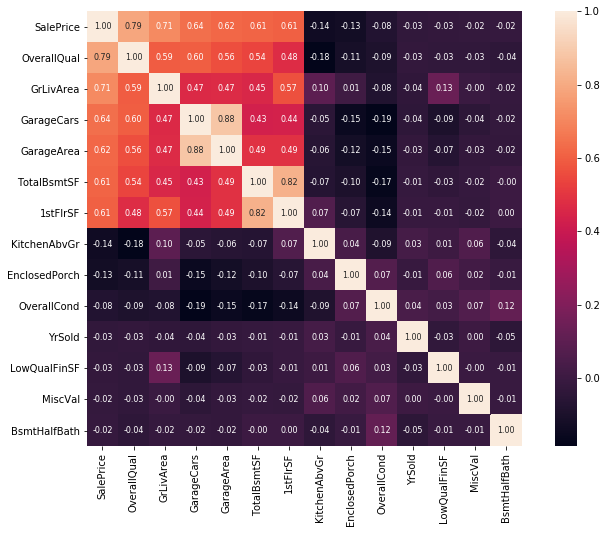

In [405]:
f,ax = plt.subplots(figsize = (12,8))
# np.corrcoef returns pearson corr coefficients
cm = np.corrcoef(x_train[merged_cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=merged_cols, xticklabels=merged_cols)
plt.show()

Discuss most positive and negative correlations.

I chose 14 features having 7 highest and 7 lowest pearson co-relation coefficent with respect to SalePrice. From the above heatmap, we can get the features having highest positive co-relation. 0.88 for GarageCars and GarageArea. Least co-relation is for MSSubClass and 1stFlrSF with value -0.25.

## Part 2 - Informative Plots

What interesting properties does Plot 1 reveal?

Text(0.5, 1, 'MSZoning Vs SalePrice')

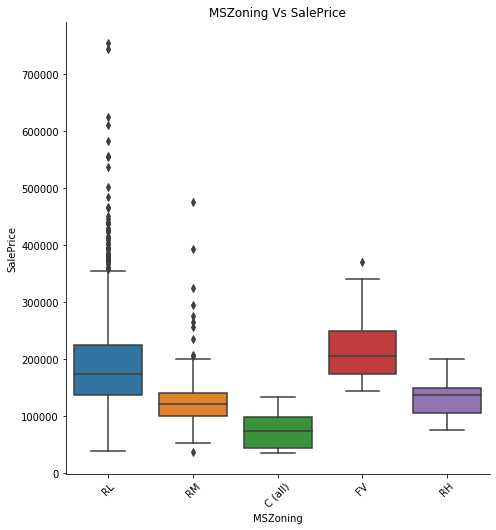

In [406]:
sns.catplot(x="MSZoning", y="SalePrice",
            kind="box", dodge=False, data=x_train, height=7)
plt.xticks(rotation=45);
plt.title('MSZoning Vs SalePrice')

Generally, Commercial housing should be having highest saleprice as the houses might have good and luxurious facilities. But from the above plot, Commercial housing has less saleprice average which is interesting. Floating Villages as the name suggests might be near lakeside so the expectation is correct that it might have higher saleprice. One more interesting observation is that RL is having higher saleprice average than RH. It's interesting because generally low residential density areas might be having less saleprice as proper facilities and neighborhoods might not be available compared to high residential density areas. 

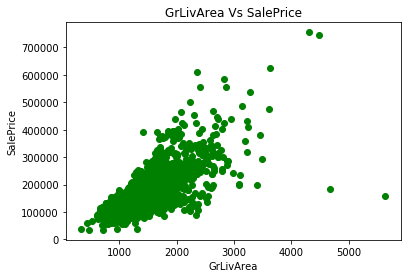

In [407]:
plt.scatter(x_train['GrLivArea'], x_train['SalePrice'], c='g')
plt.title("GrLivArea Vs SalePrice")
plt.ylabel("SalePrice")
plt.xlabel("GrLivArea")
plt.show()

There exists almost linear relationship between GrLivArea and SalePrice. One interesting observation is that there're 2 outliers whose GrLivArea is above 4000 and Saleprice < 200000. These two points seems strange. This might be some barren or agricultural land where there's no residential area nearby. So we can remove these 2 points.

Text(0.5, 1.0, 'OverallQual vs Average amount of SalePrice')

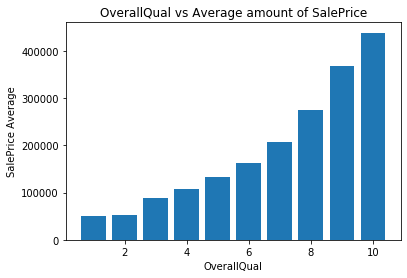

In [408]:
overall_qual_mean = x_train['SalePrice'].groupby(x_train['OverallQual']).mean()
plt.bar(range(1,11),overall_qual_mean)
plt.xlabel('OverallQual')
plt.ylabel('SalePrice Average')
plt.title('OverallQual vs Average amount of SalePrice')

As Overall quality of house increases, sale price of house increases. From the above plot we can observe that for a house with high quality, average of saleprice is higher. OverallQual almost follows x^2 with SalePrice which is not linear.

Text(0.5, 1, 'YearBuilt Vs SalePrice')

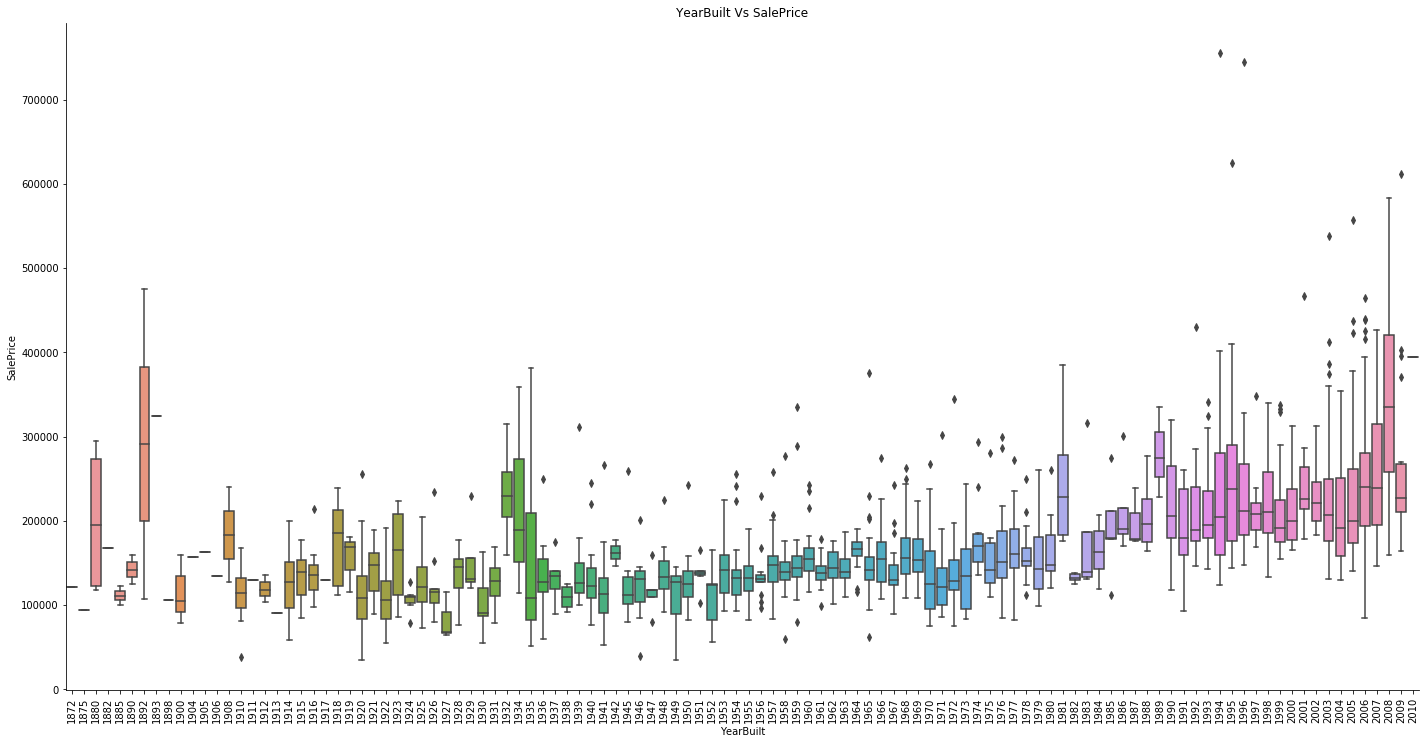

In [343]:
sns.catplot(x="YearBuilt", y="SalePrice",
            kind="box", dodge=False, data=x_train, height=10, aspect = 2)
plt.xticks(rotation=90);
plt.title('YearBuilt Vs SalePrice')

Though there's not much strong tendency, we can say that newly built houses has higher saleprice compared to old houses. The increase or decrease in saleprice amount also depends on economy and land value in that particular year.

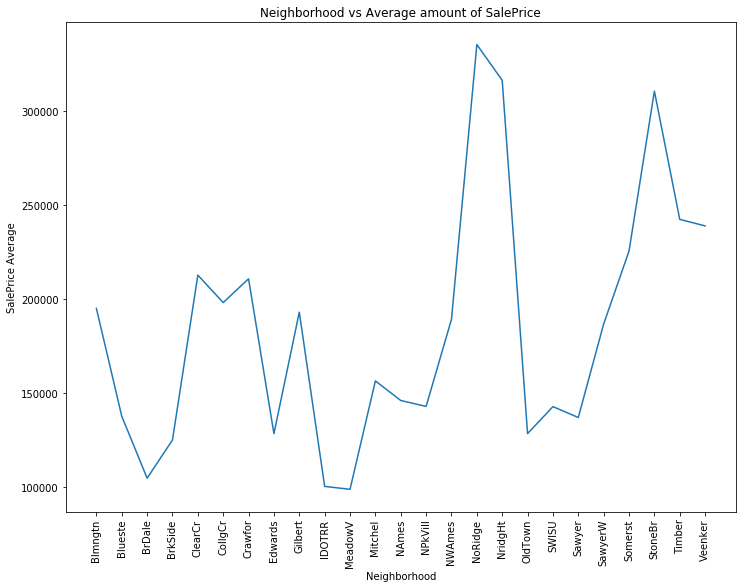

In [413]:
f, ax = plt.subplots(figsize=(12, 9))
neighborhood = np.unique(x_train["Neighborhood"])
neighborhood_mean = x_train['SalePrice'].groupby(x_train['Neighborhood']).mean()
plt.plot(neighborhood, neighborhood_mean)
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice Average')
plt.title('Neighborhood vs Average amount of SalePrice')
plt.xticks(rotation=90);

Text(0.5, 1.0, 'No. of houses in a particular neighborhood')

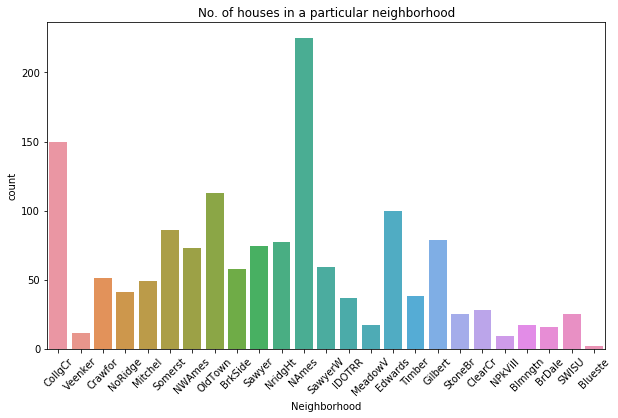

In [414]:
plt.figure(figsize = (10, 6))
sns.countplot(x ='Neighborhood', data = x_train)
plt.xticks(rotation=45)
plt.title('No. of houses in a particular neighborhood')

From the above two plots, we can infer that neighborhood plays an important role in justifying the sale price. Though the number of houses at NrindgHt and NoRidge are less compared to NAmes and CollgCr, the average saleprice is higher for NrindgHt and NoRidge. From this we can infer that houses near NrindgHt, NoRidge are costly and houses near NAmes and CollgCr are less costly.

## Part 3 - Handcrafted Scoring Function

In [415]:
enumeration = {'RL':4, 'RM':2,'C (all)':1,'FV':5,'RH':3}
enum_keyset = enumeration.keys()
train_copy = pd.DataFrame(x_train['MSZoning'])
for en in enum_keyset:
    train_copy['MSZoning'] = train_copy['MSZoning'].replace(en,enumeration.get(en))

train_copy['OverallQual'] = (numeric_train['OverallQual'])**2
train_copy['GrLivArea'] = numeric_train['GrLivArea']
train_copy['YearBuilt'] = numeric_train['YearBuilt']
train_copy['GarageArea'] = numeric_train['GarageArea']

In [416]:
train_copy['desirability'] = train_copy['OverallQual']*(1/np.mean(train_copy['OverallQual']))
+train_copy['MSZoning']*(1/np.mean(train_copy['MSZoning'])) + x_train['GrLivArea']*(1/np.mean(x_train['GrLivArea']))
+x_train['YearBuilt']*(1/np.mean(x_train['YearBuilt'])) + x_train['GarageArea']*(1/np.mean(x_train['GarageArea']))

0       2.174708
1       1.974957
2       2.300549
3       2.328807
4       2.782092
5       2.025866
6       2.361270
7       2.024178
8       1.969043
9       1.417053
10      1.808694
11      2.573203
12      1.739516
13      2.793592
14      1.738501
15      2.196368
16      2.014199
17      2.088790
18      2.234415
19      1.614860
20      2.820570
21      1.571056
22      2.144602
23      2.211754
24      1.569191
25      2.899812
26      2.207529
27      2.650330
28      1.667209
29      1.484964
          ...   
1430    1.803614
1431    1.932672
1432    1.434222
1433    1.968104
1434    2.026207
1435    1.972084
1436    2.116190
1437    2.655066
1438    2.944218
1439    2.166762
1440    2.395786
1441    1.904591
1442    2.735408
1443    1.377900
1444    2.340127
1445    1.504749
1446    1.654946
1447    2.187564
1448    1.780793
1449    0.999357
1450    1.001386
1451    2.794607
1452    2.127095
1453    1.017619
1454    1.862306
1455    1.986625
1456    2.060542
1457    1.5174

In [417]:
train_copy['desirability'].corr(x_train['SalePrice'])

0.8171684436128853

In [418]:
train_copy['SalePrice'] = x_train['SalePrice']
large_ten = train_copy.nlargest(10, "desirability")
print('Top 10 most desirable houses')
print(large_ten)

Top 10 most desirable houses
     MSZoning  OverallQual  GrLivArea  YearBuilt  GarageArea  desirability  \
58          4          100       2945       2006         641      2.556694   
185         2          100       3608       1892         840      2.556694   
224         4          100       2392       2003         968      2.556694   
389         4          100       2332       2007         846      2.556694   
440         4          100       2402       2008         672      2.556694   
515         4          100       2020       2009         900      2.556694   
523         4          100       4676       2007         884      2.556694   
583         2          100       2775       1893         880      2.556694   
591         4          100       2296       2008         842      2.556694   
691         4          100       4316       1994         832      2.556694   

     SalePrice  
58      438780  
185     475000  
224     386250  
389     426000  
440     555000  
515     40

In [419]:
least_ten = train_copy.nsmallest(10, "desirability")
print('Least 10 most desirable houses')
print(least_ten)

Least 10 most desirable houses
      MSZoning  OverallQual  GrLivArea  YearBuilt  GarageArea  desirability  \
375          4            1        904       1922           0      0.025567   
533          4            1        334       1946           0      0.025567   
636          2            4        800       1936           0      0.102268   
916          1            4        480       1949         308      0.102268   
1100         4            4        438       1920         246      0.102268   
74           2            9       1605       1915         379      0.230102   
88           1            9       1526       1915           0      0.230102   
250          4            9       1306       1940           0      0.230102   
323          2            9       1163       1955         220      0.230102   
342          4            9       1040       1949         400      0.230102   

      SalePrice  
375       61000  
533       39300  
636       60000  
916       35311  
1100     

I considered variables OverallQual, GarageArea, MSZoning, GrLivArea, YearBuilt for scoring function as these features seems to have greater co-relation with SalePrice. I considered different weights for each feature with value: 1/mean(feature).
Summation of all the features multiplied with it's respective weights gave the desirability value. Desirability values are highly co-related with SalePrice with value of 0.81.

## Part 4 - Pairwise Distance Function

In [420]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing

#x = train_data.values #returns a numpy array
scaler_min_max = preprocessing.MinMaxScaler()
train_scaled = scaler_min_max.fit_transform(train_final)

train_data = pd.DataFrame(train_scaled,columns=train_final.columns)

pca_model = PCA(n_components=50)
comp = pca_model.fit_transform(train_data)
principal_df = pd.DataFrame(data = comp)
tsne_dimen_reduc = TSNE(n_components=2).fit_transform(principal_df)
tsne_dimen_reduc.shape

(1460, 2)

In [421]:
tsne_dimen_reduc

array([[  2.7790134, -36.17673  ],
       [-19.873207 ,  23.003153 ],
       [ 12.359818 , -37.911915 ],
       ...,
       [ -2.4816294, -29.969608 ],
       [-13.216659 ,  24.471989 ],
       [ -2.2494123,   8.493286 ]], dtype=float32)

In [422]:
def pairwise_euc(x,y): 
    if len(x) != len(y):
        return False
    else:
        return np.sqrt(sum([(a-b)**2 for a,b in zip(x,y)]))

distance = []
for each_i in range(len(tsne_dimen_reduc)):
    dist = []
    for each_j in range(len(tsne_dimen_reduc)):
        dist.append(pairwise_euc(tsne_dimen_reduc[each_i], tsne_dimen_reduc[each_j]))
    distance.append(dist)

In [423]:
distance_array = np.array(distance)
print(distance_array.shape)
print(distance_array)

(1460, 1460)
[[ 0.         63.36704152  9.73666697 ...  8.13650652 62.72263341
  44.95214684]
 [63.36704152  0.         68.91744029 ... 55.75464676  6.8166793
  22.82836759]
 [ 9.73666697 68.91744029  0.         ... 16.83296785 67.42334607
  48.65051188]
 ...
 [ 8.13650652 55.75464676 16.83296785 ...  0.         55.48989399
  38.46359543]
 [62.72263341  6.8166793  67.42334607 ... 55.48989399  0.
  19.38038754]
 [44.95214684 22.82836759 48.65051188 ... 38.46359543 19.38038754
   0.        ]]


In [424]:
neighborhood_feat = x_train['Neighborhood']
true_count = 0
false_count = 0
for i in range(len(distance_array)):
    unsorted_arr = distance_array[i]
    sorted_arr = np.sort(distance_array[i])
    index_val = np.where(unsorted_arr == sorted_arr[1])[0]#ignoring 0
    if neighborhood_feat[index_val[0]]==neighborhood_feat[i]:
        true_count=true_count+1
    else:
        false_count=false_count+1

In [425]:
(true_count/(true_count+false_count))*100

52.26027397260275

Implementation:
Reduced dimensionality from about 330 features to 50 features using PCA and later reduced it to 2 dimensions using T-SNE.
Designed a handcrafted pair-wise function using euclidean.
Validate whether the smallest distance pairs contain same neighborhood or not and increment the true and false counts.
Sort each distance array and take the one with lowest pair-wise distance, and get the actual index of the element from the original dataset. Compare neighborhood labels with original value of dataset and calculated value.
Based on the above score, 52.2 percent of data matches with correct neighborhood

## Part 5 - Clustering

In [426]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(affinity='precomputed', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=10,
                        pooling_func='deprecated').fit(distance_array)
x_tsne = pd.DataFrame(tsne_dimen_reduc)
to_plot = pd.DataFrame()
to_plot['Id'] = train_ID
to_plot['x_coord'] = x_tsne[0]
to_plot['y_coord'] = x_tsne[1]
to_plot['clusters'] = cluster.labels_

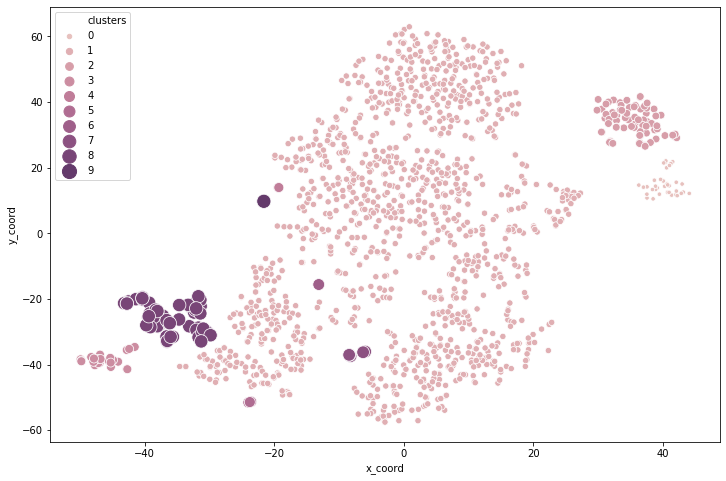

In [427]:
import seaborn as sns
plt.figure(figsize=[12,8])
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
g=sns.scatterplot(x="x_coord", y="y_coord",hue="clusters",data=to_plot,sizes=(20, 200),size="clusters", palette=cmap, legend="full");


In [428]:
import operator

for i in range(0,10):
    neighbor = neighborhood_feat[cluster.labels_==i]
    unique_val, total_count = np.unique(neighbor, return_counts=True)
    dict_neighborhood = dict(zip(unique_val, total_count))
    sorted_dict = sorted(dict_neighborhood.items(), key=operator.itemgetter(1),reverse=True)
    percent = sorted_dict[0][1] * 100.0/sum(dict_neighborhood.values())
    neighborhood = sorted_dict[0][0]
    count = sorted_dict[0][1]
    data_neighborhood = pd.DataFrame({'Clust_centre': i,'Neighborhood': neighborhood,'Count':count,'Percentage':percent}, index = [i])
    print(data_neighborhood)

   Clust_centre Neighborhood  Count  Percentage
0             0      Edwards     10   27.777778
   Clust_centre Neighborhood  Count  Percentage
1             1        NAmes    206       16.48
   Clust_centre Neighborhood  Count  Percentage
2             2      Edwards     19   25.675676
   Clust_centre Neighborhood  Count  Percentage
3             3      Somerst     25       100.0
   Clust_centre Neighborhood  Count  Percentage
4             4      Crawfor      1        50.0
   Clust_centre Neighborhood  Count  Percentage
5             5      Crawfor      3       100.0
   Clust_centre Neighborhood  Count  Percentage
6             6      Crawfor      1       100.0
   Clust_centre Neighborhood  Count  Percentage
7             7      Edwards      4   57.142857
   Clust_centre Neighborhood  Count  Percentage
8             8      Blmngtn     16   26.229508
   Clust_centre Neighborhood  Count  Percentage
9             9      OldTown      1       100.0


The above clustering was done using Agglomerative approach. This takes distance matrix as input which was calculated using pair-wise function above and gives out the cluster_labels, from which we can find out the cluster to which it belongs to. From the above details we can see that most of the datapoints belonging to Somerst, Crawfor are classified correctly. From the graph, it's understood that clusters have a clearer separation of data.

In [429]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=10, random_state=0).fit(tsne_dimen_reduc)
k_means_plot = pd.DataFrame()
k_means_plot['Id'] = train_ID
k_means_plot['x_coord'] = x_tsne[0]
k_means_plot['y_coord'] = x_tsne[1]
k_means_plot['clusters'] = k_means.labels_

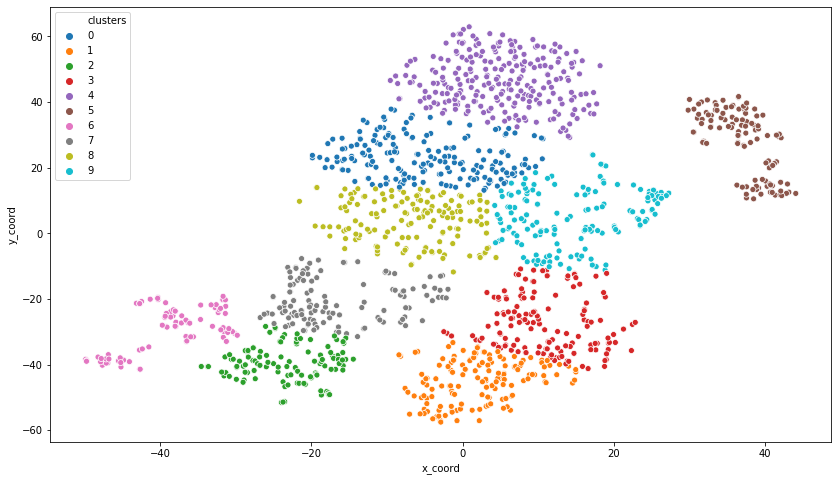

In [430]:
import seaborn as sns
plt.figure(figsize=[14,8])
ax = sns.scatterplot(x="x_coord", y="y_coord",hue="clusters",legend="full",palette=sns.color_palette()
                     ,data=k_means_plot);


In [432]:
for i in range(0,10):
    neighbor = neighborhood_feat[k_means.labels_==i]
    unique_val, total_count = np.unique(neighbor, return_counts=True)
    dict_neighborhood = dict(zip(unique_val, total_count))
    sorted_dict = sorted(dict_neighborhood.items(), key=operator.itemgetter(1),reverse=True)
    percent = sorted_dict[0][1] * 100.0/sum(dict_neighborhood.values())
    neighborhood = sorted_dict[0][0]
    count = sorted_dict[0][1]
    data_neighborhood = pd.DataFrame({'Clust_centre': i,'Neighborhood': neighborhood,'Count':count,'Percentage':percent}, index = [i])
    print(data_neighborhood)

   Clust_centre Neighborhood  Count  Percentage
0             0        NAmes    103   56.593407
   Clust_centre Neighborhood  Count  Percentage
1             1      CollgCr     32    21.47651
   Clust_centre Neighborhood  Count  Percentage
2             2      NridgHt     36   31.858407
   Clust_centre Neighborhood  Count  Percentage
3             3      Gilbert     35   24.137931
   Clust_centre Neighborhood  Count  Percentage
4             4      OldTown     89   36.326531
   Clust_centre Neighborhood  Count  Percentage
5             5      Edwards     29   26.363636
   Clust_centre Neighborhood  Count  Percentage
6             6      Somerst     25   29.069767
   Clust_centre Neighborhood  Count  Percentage
7             7      CollgCr     47   37.903226
   Clust_centre Neighborhood  Count  Percentage
8             8        NAmes     41   26.973684
   Clust_centre Neighborhood  Count  Percentage
9             9        NAmes     40   25.974026


Kmeans takes input as tsne_dimen_reduc which is the data obtained after performing dimensionality reduction using t-sne and gives the clustering labels as output. In Kmeans almost all the clusters stays the same as data is divided into k sets and assign all items to the cluster whose representative is closer, and cluster mean is calculated to get new representative. So the results appear almost uniformly distributed. From the above dataframe, NAmes is having highest percentage of data with values split between cluster_centre 0,8 and 9.

## Part 6 - Linear Regression

In [433]:
print(train_final.shape)
print(test_final.shape)

(1460, 331)
(1459, 331)


In [434]:
from sklearn.model_selection import train_test_split 
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(train_final, y_train_label, test_size = 0.3, random_state = 0)
print("X_train : " + str(x_train_split.shape))
print("X_test : " + str(x_val_split.shape))
print("y_train : " + str(y_train_split.shape))
print("y_test : " + str(y_val_split.shape))

X_train : (1022, 331)
X_test : (438, 331)
y_train : (1022,)
y_test : (438,)


Baseline Model

In [435]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train_split,y_train_split)
y_train_pred = lm.predict(x_train_split)

In [436]:
y_test_pred = lm.predict(x_val_split)

In [437]:
mse_train = (np.mean((y_train_pred - y_train_split)**2))
print("MSE on Training set : ", mse_train )


mse_test = (np.mean((y_test_pred - y_val_split)**2))

print("MSE on Test set : ", mse_test )
print(lm.score(x_val_split,y_val_split))

MSE on Training set :  0.006858881214507823
MSE on Test set :  0.0441451639851263
0.7142913744192403


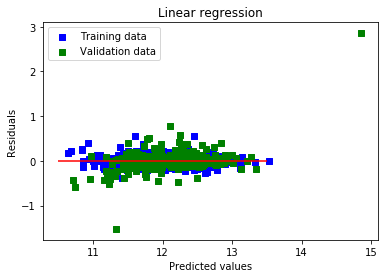

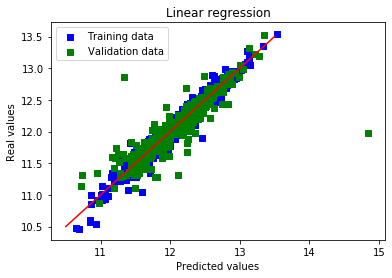

In [438]:
# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train_split, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_val_split, c = "green", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train_split, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_val_split, c = "green", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [453]:
import operator
print(lm.coef_.shape)

index_max, value_max = max(enumerate(abs(lm.coef_)), key=operator.itemgetter(1))
print(value_max)
print(index_max)
print('Important feature from Linear regression model: ',train_final.columns[index_max])

(331,)
1.230586503760977
119
Important feature from Linear regression model:  Condition2_PosN


By appling log on y_train, RMSE for linear regression gave a value of 0.044 on test set. Linear Regression worked pretty well by taking logarithm of SalePrice and converting ypred back to original format by taking exponentiation. Most important feature in linear regression model is the one with highest absolute value of coefficient vector. Most of the weights are the ones which were on-hot-encoded. The above graph gives a detail view of top 10 and least 10 important variables.


## Part 7 - External Dataset

In [454]:
#https://en.wikipedia.org/wiki/Crime_in_the_United_States - national average rates
#https://www.addressreport.com/report/neighborhood/ames-ia/somerset-ames-ia/?display=true

train_merged = pd.DataFrame(train_final)
add_data = {}
robbery_rate_nation = 98
rape_rate_nation = 41.7
murder_rate_nation = 5.3
car_theft_rate_nation = 237.4

#last two properties in the list is percentage of owners in particular neighborhood and household income

ames_average = [(1-0.94)*robbery_rate_nation,(1-0.0)*rape_rate_nation,
                (1-0.81)*murder_rate_nation,(1-0.67)*car_theft_rate_nation, 0.43, 46358]

add_data['Blmngtn'] = [(1-0.98)*robbery_rate_nation,(1-0.54)*rape_rate_nation,
                      (1-0.79)*murder_rate_nation,(1-0.77)*car_theft_rate_nation, 0.83, 95256]

add_data['Blueste'] = ames_average

add_data['BrDale'] = [(1-0.94)*robbery_rate_nation,(1-0.26)*rape_rate_nation,
                      (1-0.89)*murder_rate_nation,(1-0.70)*car_theft_rate_nation, 0.39, 45558]

add_data['BrkSide'] = ames_average

add_data['ClearCr'] = ames_average

add_data['CollgCr'] = [(1-0.93)*robbery_rate_nation,(1+0.11)*rape_rate_nation,
            (1-0.92)*murder_rate_nation,(1-0.54)*car_theft_rate_nation, 0.54, 66875]

add_data['Crawfor'] = ames_average

add_data['Edwards'] = ames_average

add_data['Gilbert'] = ames_average

add_data['IDOTRR'] = ames_average

add_data['MeadowV'] = [(1-0.92)*robbery_rate_nation,(1+0.22)*rape_rate_nation,
            (1-0.78)*murder_rate_nation,(1-0.46)*car_theft_rate_nation, 0.5, 53962]

add_data['Mitchel'] = ames_average

add_data['NAmes'] = ames_average

add_data['NoRidge'] = ames_average

add_data['NPkVill'] = ames_average

add_data['NridgHt'] = [(1-0.98)*robbery_rate_nation,(1-0.54)*rape_rate_nation,
            (1-0.79)*murder_rate_nation,(1-0.77)*car_theft_rate_nation, 0.83, 95256]

add_data['NWAmes'] = ames_average

add_data['OldTown'] = ames_average

add_data['SWISU'] = ames_average

add_data['Sawyer'] = ames_average

add_data['SawyerW'] = ames_average

add_data['Somerst'] = [(1-0.97)*robbery_rate_nation,(1-0.39)*rape_rate_nation,
            (1-0.78)*murder_rate_nation,(1-0.69)*car_theft_rate_nation, 0.61, 84600]

add_data['StoneBr'] = [(1-0.98)*robbery_rate_nation,(1-0.54)*rape_rate_nation,
            (1-0.79)*murder_rate_nation,(1-0.77)*car_theft_rate_nation, 0.83, 95256]

add_data['Timber'] = ames_average

add_data['Veenker'] = ames_average

train_merged['robbery_rate'] = 0
train_merged['rape_rate'] = 0
train_merged['murder_rate'] = 0
train_merged['car_theft_rate'] = 0

keyset = ['rate_of_robbery','rape_rate','rate_murder','rate_car_theft', 'owned_property', 'household_income']

robbery_rate = []
rape_rate = []
murder_rate = []
car_theft_rate = []
owned_prop = []
income = []

for i in range(len(train_merged)):
    neighborhood = x_train.iloc[i]['Neighborhood']
    robbery_rate.append(add_data[neighborhood][0])
    rape_rate.append(add_data[neighborhood][1])
    murder_rate.append(add_data[neighborhood][2])
    car_theft_rate.append(add_data[neighborhood][3])
    owned_prop.append(add_data[neighborhood][4])
    income.append(add_data[neighborhood][4])


train_merged['rate_of_robbery']=robbery_rate
train_merged['rape_rate']=rape_rate
train_merged['rate_murder']=murder_rate
train_merged['rate_car_theft']=car_theft_rate
train_merged['owned_property']=owned_prop
train_merged['household_income']=income

In [455]:
print(train_merged.shape)

(1460, 340)


In [456]:
x_train_merged_split, x_val_merged_split, y_train_merged_split, y_val_merged_split = train_test_split(train_merged, y_train_label, test_size = 0.3, random_state = 0)


In [457]:
lm.fit(x_train_merged_split,y_train_merged_split)
y_train_pred_merge = lm.predict(x_train_merged_split)
mse_train_merged = (np.mean((y_train_pred_merge - y_train_merged_split)**2))
print("MSE on Training set after adding new dataset : ", mse_train_merged )
y_val_pred_merge = lm.predict(x_val_merged_split)
mse_test_merged = (np.mean((y_val_pred_merge - y_val_merged_split)**2))
print("MSE on Test set after adding new dataset : ", mse_test_merged )

MSE on Training set after adding new dataset :  0.0068588812145078245
MSE on Test set after adding new dataset :  0.044145163985125496


Assumption is that sale_price will be less in the areas where the crime_rate is high. These features might help in predicting salePrice but there's not much difference in MSE after adding external dataset related to crime_rate in the neighborhood area like robbery, rape_rate, murder_rate, car_theft rate. Some other features like percentage of owned property currently occupied by owners and also income of household.

## Part 8 - Permutation Test

In [458]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.permutation_test_score.html
from sklearn.model_selection import permutation_test_score

lm = LinearRegression()
ten_variables = ['OverallQual', 'GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath',
                'YearBuilt','TotRmsAbvGrd','YearRemodAdd']

for each_col in ten_variables:
    train_each_feat = np.array(train_final[each_col])
    train_each_feat = np.reshape(train_each_feat, (train_each_feat.shape[0],1))
    model = lm.fit(train_each_feat,y_train_label)
    p_value = permutation_test_score(model, train_each_feat, y_train_label,n_permutations=100)
    print(p_value)

(0.6662141142239526, array([-2.02756334e-03, -6.90362761e-03, -2.76302822e-03, -3.20248134e-05,
       -1.73549804e-03, -3.65261092e-04, -4.29779841e-03, -1.03059442e-03,
       -5.59690431e-03, -8.91864518e-03, -2.17393594e-03, -1.07519103e-03,
       -4.28092880e-03, -4.95740262e-03, -6.31858375e-03, -1.46594218e-03,
       -3.69676729e-03, -7.42087989e-03, -5.92302887e-03, -1.00800626e-03,
       -1.10959652e-02, -5.94655675e-03, -5.80500479e-03, -6.38010217e-03,
       -2.49115151e-03, -2.12385487e-03, -3.65991819e-03, -5.70071257e-04,
       -7.54425074e-03, -3.29459214e-03, -6.96533492e-03, -2.24177085e-03,
       -6.78704158e-03, -9.81676320e-03, -4.32468506e-03, -1.74235056e-03,
       -1.01697479e-02, -3.64507296e-03,  1.40456887e-03, -2.86992789e-03,
        2.22059695e-04, -3.34137835e-03, -7.35697146e-03, -2.24688282e-03,
        7.34864175e-04, -3.29791046e-03, -4.67343358e-03, -2.57094652e-02,
       -1.19000533e-02, -3.02189407e-03,  3.29546578e-03, -1.97373421e-03,
    

(0.34811127945711773, array([ 0.00261247, -0.00366721, -0.00296434, -0.00610886, -0.00388074,
       -0.00164239, -0.00453493, -0.00616054, -0.00306994, -0.00758306,
       -0.00739667, -0.00099793, -0.00300327, -0.00330107, -0.00709168,
       -0.00722355, -0.00093152, -0.00744742, -0.00673672, -0.00357165,
       -0.00877695, -0.01061073, -0.0052714 , -0.00442366, -0.00479763,
       -0.00248377, -0.00343825, -0.00329637, -0.00528941, -0.00042735,
       -0.01080339, -0.0019792 , -0.00874897, -0.0073968 , -0.00121652,
       -0.00194538, -0.0086483 , -0.00556355, -0.00200707, -0.0067012 ,
       -0.00017747, -0.00939609, -0.00624273, -0.00210152, -0.00234863,
       -0.00392707, -0.00349252, -0.02450075, -0.01320986, -0.00133141,
       -0.00166187, -0.00292224, -0.00256785, -0.00261349, -0.00634405,
       -0.00038391, -0.00553147, -0.00423557, -0.0024136 , -0.00689498,
       -0.00770518, -0.00510518, -0.0006732 , -0.01153512, -0.00547309,
       -0.01489312, -0.00056312, -0.000958

The p-value, which approximates the probability that the score would be obtained by chance. This is calculated as:

   (C + 1) / (n_permutations + 1)
   Where C is the number of permutations whose score >= the true score.

In the first iteration with feature OverallQual, true score observed is 0.66. But all the permutation values are < true score so in this case C value is 0.
In similar way, for all the considered features the true value is larger than all the permutations. So C is 0 in all cases.

The p-value is therefore 1/(100 + 1) = 0.0099 as obtained

## Part 9 - Final Result

1. Applied Linear Regression as baseline-model.
2. Compared to Lasso, Ridge regression is giving better Mean squared error for test set.
3. Done hyper parameter tuning for both Ridge and Lasso regression

In [459]:
from sklearn.linear_model import RidgeCV

# hyper parameter tuning
ridge_model = RidgeCV(alphas = [1e-12, 1e-10, 1e-8, 1e-6, 1e-4,1e-2, 1, 5, 8, 9, 10, 10.2, 10.5,12,14, 15, 20, 25, 30, 40, 50, 60, 100])
ridge_model.fit(x_train_split, y_train_split)
lamda = ridge_model.alpha_
print("Best lamda :", lamda)

Best lamda : 15.0


In [460]:
ridge_model.fit(x_train_split, y_train_split)
ytrain_rid_pred = ridge_model.predict(x_train_split)

In [461]:
ytest_rid_pred = ridge_model.predict(x_val_split)

In [462]:
mse_train = (np.mean((ytrain_rid_pred - y_train_split)**2))
print("MSE on Training set after L2 reg: ", mse_train )


mse_test = (np.mean((ytest_rid_pred - y_val_split)**2))

print("MSE on Test set after L2 reg : ", mse_test )

# MSE on the test set slightly increased after applying L2 Regularization

MSE on Training set after L2 reg:  0.010927692491958208
MSE on Test set after L2 reg :  0.02595027602207179


In [463]:
coefs = pd.Series(ridge_model.coef_, index = x_train_split.columns)
print("ridge model picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")

ridge model picked 322 features and eliminated the other 9 features


In [464]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(alphas = [0.0001, 0.00045,0.0004,0.00048 , 0.001, 0.002,0.004, 0.006, 0.01, 0.02,0.04, 0.06, 0.1, 
                          0.4, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(x_train_split, y_train_split)
best_alpha = lasso.alpha_
print("best_alpha :", best_alpha)

best_alpha : 0.0004


In [465]:
lasso.fit(x_train_split, y_train_split)
ytrain_l1_pred = lasso.predict(x_train_split)
ytest_l1_pred = lasso.predict(x_val_split)

In [466]:
mse_train = (np.mean((ytrain_l1_pred - y_train_split)**2))
print("MSE on Training set after L1 reg : ", mse_train )


mse_test = (np.mean((ytest_l1_pred - y_val_split)**2))

print("MSE on Test set after L1 reg : ", mse_test )


MSE on Training set after L1 reg :  0.009165805932448604
MSE on Test set after L1 reg :  0.031299195582668526


In [467]:
coefs = pd.Series(lasso.coef_, index = x_train_split.columns)
print("lasso model picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")

lasso model picked 135 features and eliminated the other 196 features


In [468]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
# A parameter grid for XGBoost
params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}


In [ ]:
xgb = XGBRegressor(nthread=-1) 

grid_search = GridSearchCV(xgb, params)
grid_search.fit(x_train_split, y_train_split)

In [ ]:
ytrain_xgb_pred = grid_search.predict(x_train_split)
ytest_xgb_pred = grid_search.predict(x_val_split)

mse_train = (np.mean((ytrain_xgb_pred - y_train_split)**2))
print("MSE on Training set after xgb : ", mse_train )


mse_test = (np.mean((ytest_xgb_pred - y_val_split)**2))

print("MSE on Test set after xgb : ", mse_test )

In [ ]:
y_pred_test_final = lasso.predict(test_final)
#y_pred_test_final = np.exp(y_pred_test_final)
y_predict_test_df = pd.DataFrame(y_pred_test_final, columns=['SalePrice'])
final_df= pd.DataFrame(data={'Id':test_ID,'SalePrice':y_predict_test_df['SalePrice']})
print(final_df.head(5))
final_df.to_csv('submissionlas.csv', index=False)

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/meghanavemulapalli

Highest Rank: 914

Score: 0.11971

Number of entries: 7

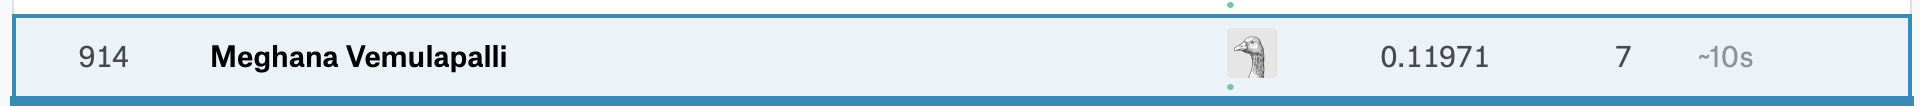